## **Predicting Newsletter Subscription Conversions Using Machine Learning**

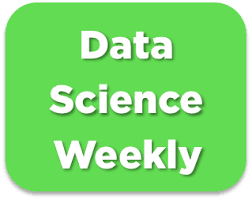

## **Introduction**
In this project, we aim to predict whether a website visitor will subscribe to the "Data Science Weekly" newsletter based on their behavior and demographic information. By leveraging machine learning techniques, we can identify key factors that influence subscription conversions and provide actionable insights to improve marketing strategies. The dataset includes various user attributes such as country, age, new or returning user status, traffic source, and total pages visited.

## **Step 1: Load the Data**

In [1]:
import pandas as pd

# Load the training dataset
data_train = pd.read_csv('/conversion_data_train.csv')

# Display the first few rows of the dataset
print(data_train.head())


   country  age  new_user  source  total_pages_visited  converted
0    China   22         1  Direct                    2          0
1       UK   21         1     Ads                    3          0
2  Germany   20         0     Seo                   14          1
3       US   23         1     Seo                    3          0
4       US   28         1  Direct                    3          0


## **Step 2: Initial Data Inspection**

In [2]:
# Check for missing values
print(data_train.isnull().sum())

# Summary statistics
print(data_train.describe())

# Data types of each column
print(data_train.dtypes)


country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64
                 age       new_user  total_pages_visited      converted
count  284580.000000  284580.000000        284580.000000  284580.000000
mean       30.564203       0.685452             4.873252       0.032258
std         8.266789       0.464336             3.341995       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000
country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: ob

## **Step 3: Exploratory Data Analysis (EDA)**

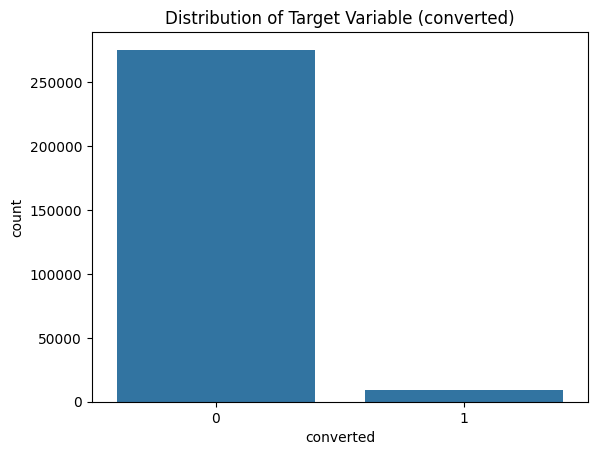

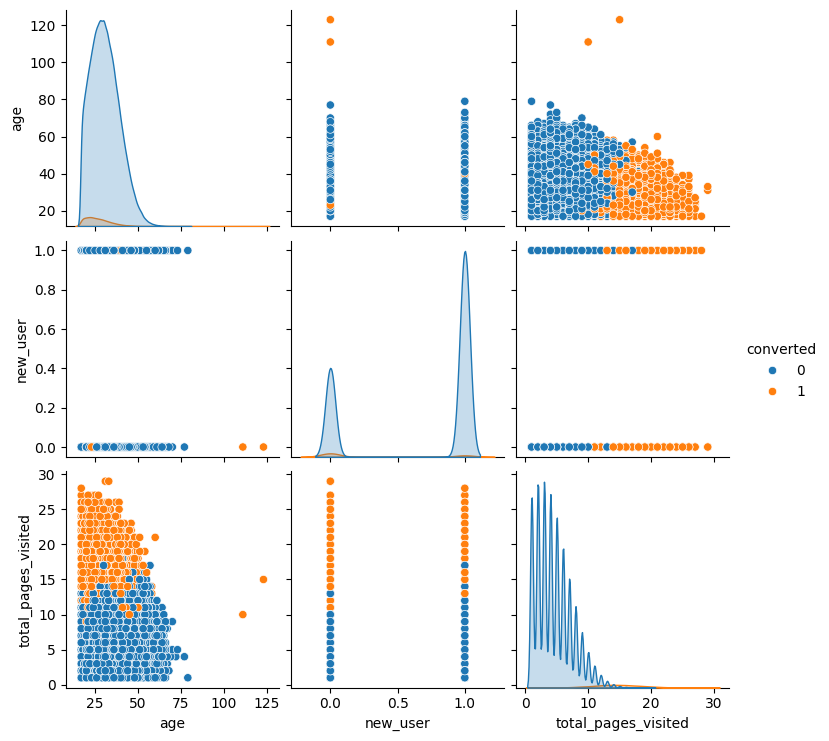

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
sns.countplot(x='converted', data=data_train)
plt.title('Distribution of Target Variable (converted)')
plt.show()

# Pairplot to visualize relationships between features and target
sns.pairplot(data_train, hue='converted')
plt.show()


## **Step 4: Data Preprocessing**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define feature columns
numeric_features = ['age', 'total_pages_visited']
categorical_features = ['country', 'source']

# Define transformations for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define transformations for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and testing sets
X = data_train.drop('converted', axis=1)
y = data_train['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Step 5: Model Training and Evaluation**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Define the model pipeline
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())])

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


Confusion Matrix:
 [[54812   246]
 [  629  1229]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     55058
           1       0.83      0.66      0.74      1858

    accuracy                           0.98     56916
   macro avg       0.91      0.83      0.86     56916
weighted avg       0.98      0.98      0.98     56916

F1 Score: 0.7374737473747374


## **Step 6: Model Improvement with Random Forest**

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print('Confusion Matrix (RF):\n', confusion_matrix(y_test, y_pred_rf))
print('Classification Report (RF):\n', classification_report(y_test, y_pred_rf))
print('F1 Score (RF):', f1_score(y_test, y_pred_rf))


Confusion Matrix (RF):
 [[54786   272]
 [  663  1195]]
Classification Report (RF):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     55058
           1       0.81      0.64      0.72      1858

    accuracy                           0.98     56916
   macro avg       0.90      0.82      0.86     56916
weighted avg       0.98      0.98      0.98     56916

F1 Score (RF): 0.718796992481203


## **Step 7: Create Test Data for Prediction**

In [8]:
# Simulate a test dataset
data_test = data_train.sample(frac=0.2, random_state=42)

# Separate features from the test dataset
X_test_final = data_test.drop('converted', axis=1)

# Preprocess the test dataset
X_test_final_preprocessed = preprocessor.transform(X_test_final)


## **Step 8: Prediction on Test Set**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define feature columns
numeric_features = ['age', 'total_pages_visited']
categorical_features = ['country', 'source']

# Define transformations for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define transformations for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and testing sets
X = data_train.drop('converted', axis=1)
y = data_train['converted']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Define the Random Forest model pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the Random Forest model
print('Confusion Matrix (RF):\n', confusion_matrix(y_val, y_val_pred))
print('Classification Report (RF):\n', classification_report(y_val, y_val_pred))
print('F1 Score (RF):', f1_score(y_val, y_val_pred))


Confusion Matrix (RF):
 [[54774   284]
 [  648  1210]]
Classification Report (RF):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     55058
           1       0.81      0.65      0.72      1858

    accuracy                           0.98     56916
   macro avg       0.90      0.82      0.86     56916
weighted avg       0.98      0.98      0.98     56916

F1 Score (RF): 0.7219570405727923


In [12]:
# Simulate a test dataset
data_test = data_train.sample(frac=0.2, random_state=42)

# Separate features from the test dataset
X_test_final = data_test.drop('converted', axis=1)

# Ensure the preprocessor pipeline is fit and transform the test dataset
X_test_final_preprocessed = preprocessor.transform(X_test_final)


In [13]:
# Generate predictions using the full pipeline (including preprocessor and classifier)
y_test_pred = rf_model.predict(X_test_final)

# Save the predictions to a CSV file
submission = pd.DataFrame({'Id': data_test.index, 'converted': y_test_pred})
submission.to_csv('submission.csv', index=False)


## **Step 9: Model Analysis and Recommendations**


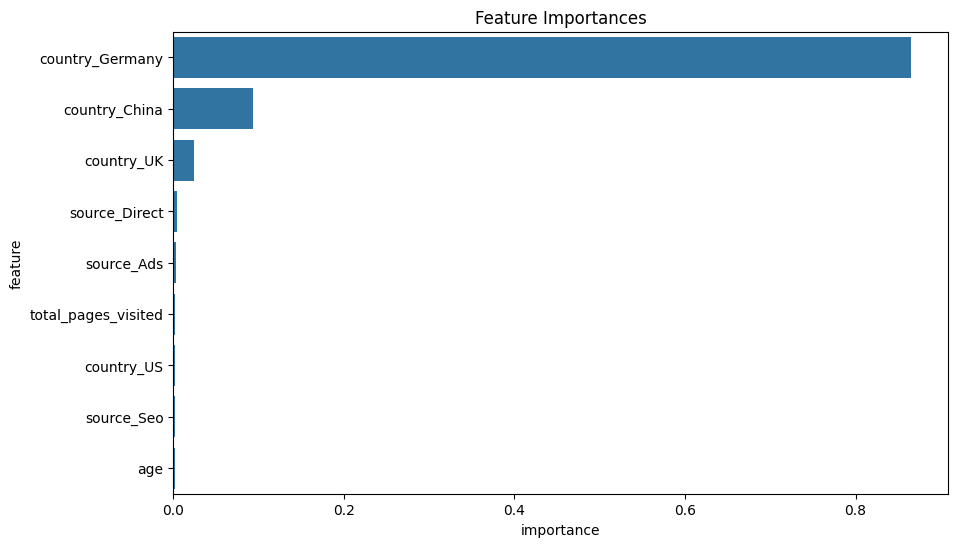

Top features influencing the conversion rate:
           feature  importance
1  country_Germany    0.865425
0    country_China    0.093981
2       country_UK    0.023788
5    source_Direct    0.004449
4       source_Ads    0.003529
Recommendations:
1. Focus on users from countries with higher conversion rates.
2. Enhance marketing strategies for new users and returning users based on feature importance.
3. Optimize the website for the most important referral sources.


In [14]:
# Get feature importances from the Random Forest model
importances = rf_model.named_steps['classifier'].feature_importances_
feature_names = rf_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features).tolist() + numeric_features
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Recommendations based on feature analysis
print("Top features influencing the conversion rate:")
print(feature_importances.head())

# Example recommendations
print("Recommendations:")
print("1. Focus on users from countries with higher conversion rates.")
print("2. Enhance marketing strategies for new users and returning users based on feature importance.")
print("3. Optimize the website for the most important referral sources.")


## **Conclusion**
Through our analysis, we identified that the most influential factors in predicting conversions are the country of the user, with Germany and China being the top contributors, followed by the source of the traffic. Based on these insights, we recommend focusing marketing efforts on users from countries with higher conversion rates, enhancing strategies for both new and returning users, and optimizing the website for the most effective referral sources. By implementing these recommendations, we anticipate an increase in the newsletter subscription rate, contributing to the overall growth of the audience and engagement with the "Data Science Weekly" newsletter.